# Data Augmentation To Address Over-fitting (In Flower Classification CNN)

**Data augmentation** is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc.

Reference: https://www.tensorflow.org/tutorials/images/classification

In [2]:
import os
import pathlib 

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import cv2
import PIL

## Data Ingestion

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='../artifacts/', untar=True)
# untar true -> will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 47s 0us/step


In [4]:
print(data_dir)

data_dir = pathlib.Path(data_dir)
data_dir

../artifacts/datasets\flower_photos


WindowsPath('../artifacts/datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('../artifacts/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('../artifacts/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('../artifacts/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('../artifacts/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('../artifacts/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


[WindowsPath('../artifacts/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('../artifacts/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('../artifacts/datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('../artifacts/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('../artifacts/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]


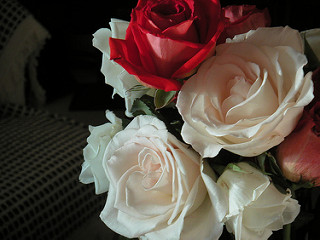

In [7]:
roses = list(data_dir.glob('roses/*'))
print(roses[:5])

PIL.Image.open(str(roses[1]))

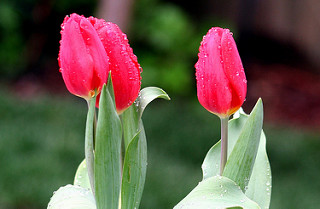

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

## Read flowers images from disk into numpy array using opencv

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

flowers_images_dict['roses'][:5]

[WindowsPath('../artifacts/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('../artifacts/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('../artifacts/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('../artifacts/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('../artifacts/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [10]:
str(flowers_images_dict['roses'][0])

'..\\artifacts\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

### CV2 Game

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [17]:
img.shape

(240, 179, 3)

resize to standard size

In [ ]:
cv2.resize(img,(180, 180)).shape

(180, 180, 3)

In [13]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

X = np.array(X)
y = np.array(y)

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2752, 180, 180, 3) (918, 180, 180, 3)
(2752,) (918,)


## Data Pre-processing: Scaling

In [15]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## Model: CNN

In [20]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'), # 16 = no. of filters, 3x3 = size of each filter, padding same = same convolution
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(), # converting 2D to 1D
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 233ms/step - accuracy: 0.3750 - loss: 1.4438
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.5945 - loss: 1.0044
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.6732 - loss: 0.8298
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - accuracy: 0.8008 - loss: 0.5545
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 251ms/step - accuracy: 0.8630 - loss: 0.4054
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 253ms/step - accuracy: 0.9309 - loss: 0.2087
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 281ms/step - accuracy: 0.9631 - loss: 0.1170
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 223ms/step - accuracy: 0.9752 - loss: 0.0810
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.9927 - loss: 0.0387
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 279ms/step - accuracy: 0.9947 - loss: 0.0380


In [21]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6744 - loss: 1.7503


[1.7904821634292603, 0.671023964881897]

#### The model is probably **over-fitted**, as the *train accuracy* is **very high** (**99.47%**) & *test accuracy* dropped to **average** (**67.44%**)

In [41]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.47      0.54       176
           1       0.42      0.72      0.53       154
           2       0.79      0.13      0.23       226
           3       0.52      0.77      0.62       150
           4       0.56      0.68      0.61       212

    accuracy                           0.53       918
   macro avg       0.58      0.56      0.51       918
weighted avg       0.60      0.53      0.49       918



In [22]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step


array([[  4.476753  ,  22.710625  ,   0.25026745, -15.0263    ,
         -2.2409995 ],
       [  5.0583086 ,  -1.8350683 ,  -7.9359403 ,  -3.70905   ,
          0.48551324],
       [ -0.55440617,   2.977427  ,  10.8899355 ,  -9.625019  ,
         -8.511031  ],
       ...,
       [  1.9743135 ,  -4.213931  ,  -4.16352   ,   5.7914467 ,
          7.8446865 ],
       [  0.47618833,   2.515011  ,   1.8473128 ,  -3.6607213 ,
         -5.0935745 ],
       [  1.2404186 , -11.4044895 ,   2.788674  ,   6.0873632 ,
          3.071632  ]], dtype=float32)

In [23]:
score = tf.nn.softmax(predictions[0])
print(np.argmax(score))
print(y_test[0])

1
1


## Data Augmentation to address over-fitting & improve test accuracy

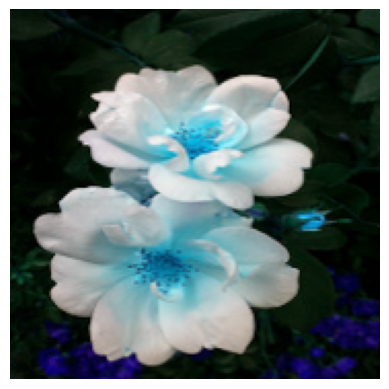

In [24]:
# original image
plt.axis('off')
plt.imshow(X[0])

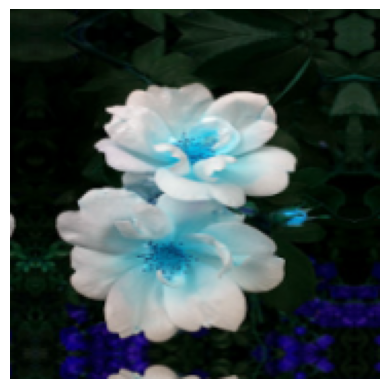

In [ ]:
data_augmentation_zoom = keras.Sequential([
    layers.RandomZoom(0.2), # the image will be zoomed in/out randomly by 0.2
])

plt.axis('off')
plt.imshow(data_augmentation_zoom(X)[0].numpy().astype("uint8"))

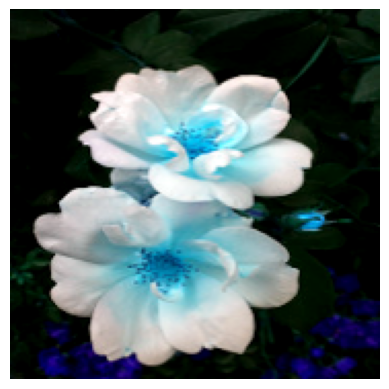

In [ ]:
data_augmentation_contrast = keras.Sequential([
    layers.RandomContrast(0.5),
])

plt.axis('off')
plt.imshow(data_augmentation_contrast(X)[0].numpy().astype("uint8"))

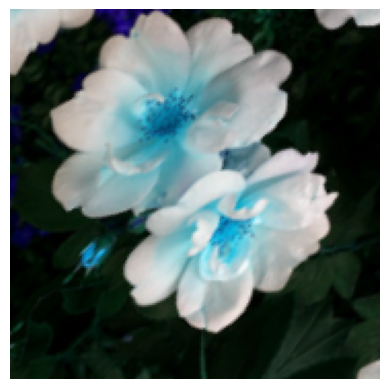

In [37]:
data_augmentation_rotation = keras.Sequential([
    layers.RandomRotation(0.5),
])

plt.axis('off')
plt.imshow(data_augmentation_rotation(X)[0].numpy().astype("uint8"))

In [39]:
img_height, img_width = 180, 180

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip(
            "horizontal", 
            input_shape=(img_height, img_width, 3)
        ),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


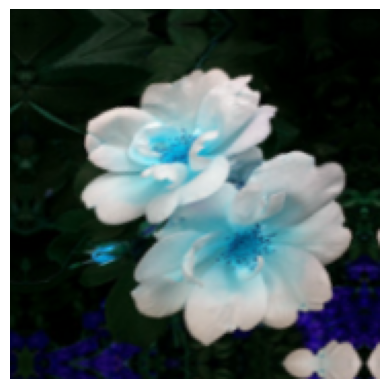

In [40]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

## Model: CNN with Data Augmentation & Dropout Layer

In [43]:
num_classes = 5

model = Sequential([
    data_augmentation, # data augmentation layer
    
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2), # dropout layer to prevent overfitting, 0.2 = dropout rate, i.e. it will drop 20% of the neurons at random in each pass thus giving a better generalization
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step - accuracy: 0.3199 - loss: 1.5112
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 271ms/step - accuracy: 0.5673 - loss: 1.0571
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 249ms/step - accuracy: 0.6419 - loss: 0.9429
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 261ms/step - accuracy: 0.6677 - loss: 0.8547
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - accuracy: 0.6937 - loss: 0.7928
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - accuracy: 0.7095 - loss: 0.7827
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.7213 - loss: 0.7260
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.7310 - loss: 0.6855
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 237ms/step - accuracy: 0.7503 - loss: 0.6792
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.7635 - loss: 0.6239


In [44]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.7002 - loss: 0.7651


[0.7664234638214111, 0.6949890851974487]

### Train accuracy might have dropped a bit i.e. **76.35%**, but the model's test accuracy improved i.e. almost **70%**

In [45]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.17      0.28       176
           1       0.36      0.84      0.51       154
           2       1.00      0.01      0.02       226
           3       0.53      0.85      0.65       150
           4       0.55      0.74      0.63       212

    accuracy                           0.48       918
   macro avg       0.66      0.52      0.42       918
weighted avg       0.68      0.48      0.40       918



* by using *"startify=y"* & *"test_size=0.2"* arguments, we can improve the accuracy further more